<b>Frank Shanahan<br/>
MSIS 2802 - Final Project<br/>
Data Set - Kaggle - Hong Kong Marathon 2016

In [4]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
pd.set_option('precision', 2) # show only two decimal digits
import datetime
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Import data set.

In [6]:
df  = pd.read_csv('challenge.csv')
df

,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time
0,1,1,1,MMS,21080,Kenya,2:12:12,2:12:11,0:30:35,1:04:48,1:33:36
1,2,2,1,MMI,14,Kenya,2:12:14,2:12:13,0:30:34,1:04:48,1:33:36
2,3,3,2,MMI,2,Ethiopia,2:12:20,2:12:18,0:30:35,1:04:49,1:33:36
3,4,4,2,MMS,21077,Kenya,2:12:29,2:12:27,0:30:35,1:04:48,1:33:36
4,5,5,3,MMI,18,Ethiopia,2:12:47,2:12:46,0:30:34,1:04:48,1:33:36
5,6,6,4,MMI,21,Ethiopia,2:13:02,2:13:01,0:30:34,1:04:48,1:33:36
6,7,7,3,MMS,21078,Kenya,2:13:20,2:13:18,0:30:34,1:04:48,1:33:36
7,8,8,4,MMS,21090,Ethiopia,2:17:27,2:17:21,0:30:35,1:05:05,1:33:36
8,9,9,5,MMS,21084,Ethiopia,2:17:39,2:17:37,0:30:35,1:05:50,1:35:04
9,10,10,5,MMI,12,Kenya,2:19:27,2:19:26,0:30:34,1:04:48,1:33:36


#### Rename columns

In [219]:
df.columns = ['Overall_Position', 'Gender_Position', 'Category_Position','Category','Race_No','Country ','Official_Time','26.2_mile_time', '6.2_mile_time', '13.1_mile_time', '18.6_mile_time']

#### Drop useless columns

In [220]:
df2 = df.drop(['Race_No','Category_Position'], inplace=True, axis=1)

#### Get Dummy variable for Category

In [221]:
df2 = pd.get_dummies(df,columns=['Category'])

<b>Column & Row Names / Descriptions:</b><br/>
<ul>
   <li> Each row is a runners data taken by electronic race tracking</li>
   <li> Overall_Position: rank for all runners</li>
   <li> Gender_Position: rank for male and female</li>
   <li> Official_Time: Time based on the shot gun start</li> 
   <li> 26.2, 6.2, 13.1, & 18.6_mile_time: Time based on actual time person crossed the mat</li>
   <li> Category Dummies<br/>
       MMI = Mens Masters Invited, MM1 = Mens Masters 1, MM2 = Mens Masters 2, MMS = Mens Senior<br/>
       MFI = Female Masters Invited, MFM1 = Female Masters 1, MFM2 = Female Masters 2, MFS = Female Senior
   

#### A first look at the dataset:

In [222]:
df2.head()

,Overall_Position,Gender_Position,Country,Official_Time,26.2_mile_time,6.2_mile_time,13.1_mile_time,18.6_mile_time,Category_MFI,Category_MFM1,Category_MFM2,Category_MFS,Category_MMI,Category_MMM1,Category_MMM2,Category_MMS
0,1,1,Kenya,2:12:12,2:12:11,0:30:35,1:04:48,1:33:36,0,0,0,0,0,0,0,1
1,2,2,Kenya,2:12:14,2:12:13,0:30:34,1:04:48,1:33:36,0,0,0,0,1,0,0,0
2,3,3,Ethiopia,2:12:20,2:12:18,0:30:35,1:04:49,1:33:36,0,0,0,0,1,0,0,0
3,4,4,Kenya,2:12:29,2:12:27,0:30:35,1:04:48,1:33:36,0,0,0,0,0,0,0,1
4,5,5,Ethiopia,2:12:47,2:12:46,0:30:34,1:04:48,1:33:36,0,0,0,0,1,0,0,0


#### How many runners in the race?

In [223]:
len(df.Overall_Position)

5616

#### Drop rows with NaN. Runners likely missed passing over the time keeper race pad. Dataset large enough we're not worried about negatively impacting the analysis statistically.

In [7]:
df2 = df2.dropna(subset = ['6.2_mile_time', '13.1_mile_time', '18.6_mile_ti

NameError: name 'df2' is not defined

In [225]:
len(df2.Overall_Position)

5586

#### Convert the hour time interval into seconds for ease of interpretation:

In [226]:
official_time_temp = pd.DatetimeIndex(df2['Official_Time'])
full_net_time_temp = pd.DatetimeIndex(df2['26.2_mile_time'])
quarter_net_time_temp = pd.DatetimeIndex(df2['6.2_mile_time'])
half_net_time_temp = pd.DatetimeIndex(df2['13.1_mile_time'])
three_quarter_net_time_temp = pd.DatetimeIndex(df2['18.6_mile_time'])
df2['Official_Time (s)'] = official_time_temp.hour*3600 + official_time_temp.minute*60 + official_time_temp.second
df2['26.2_mile_time (s)'] = full_net_time_temp.hour*3600 + full_net_time_temp.minute*60 + full_net_time_temp.second
df2['6.2_mile_time (s)'] = quarter_net_time_temp.hour*3600 + quarter_net_time_temp.minute*60 + quarter_net_time_temp.second
df2['13.1_mile_time (s)'] = half_net_time_temp.hour*3600 + half_net_time_temp.minute*60 + half_net_time_temp.second
df2['18.6_mile_time (s)'] = three_quarter_net_time_temp.hour*3600 + three_quarter_net_time_temp.minute*60 + three_quarter_net_time_temp.second
df2.sort_values('26.2_mile_time (s)').head(1)

,Overall_Position,Gender_Position,Country,Official_Time,26.2_mile_time,6.2_mile_time,13.1_mile_time,18.6_mile_time,Category_MFI,Category_MFM1,...,Category_MFS,Category_MMI,Category_MMM1,Category_MMM2,Category_MMS,Official_Time (s),26.2_mile_time (s),6.2_mile_time (s),13.1_mile_time (s),18.6_mile_time (s)
0,1,1,Kenya,2:12:12,2:12:11,0:30:35,1:04:48,1:33:36,0,0,...,0,0,0,0,1,7932,7931,1835,3888,5616


#### Add column for Male & Female. Added 'Total_Runners' in the event it helped find comparrison statistics of male vs. female.

In [227]:
df2['male'] = ((df2.Category_MMI == 1) | (df2.Category_MMM1 == 1) | (df2.Category_MMM2 == 1) | (df2.Category_MMS == 1))
df2['female'] = ((df2.Category_MFI == 1) | (df2.Category_MFM1 == 1) | (df2.Category_MFM2 == 1) | (df2.Category_MFS == 1))
df2['total_runners'] = ((df2.Category_MFI == 1) | (df2.Category_MFM1 == 1) | (df2.Category_MFM2 == 1) | (df2.Category_MFS == 1) | (df2.Category_MMI == 1) | (df2.Category_MMM1 == 1) | (df2.Category_MMM2 == 1) | (df2.Category_MMS == 1))
df2.head(1)

,Overall_Position,Gender_Position,Country,Official_Time,26.2_mile_time,6.2_mile_time,13.1_mile_time,18.6_mile_time,Category_MFI,Category_MFM1,...,Category_MMM2,Category_MMS,Official_Time (s),26.2_mile_time (s),6.2_mile_time (s),13.1_mile_time (s),18.6_mile_time (s),male,female,total_runners
0,1,1,Kenya,2:12:12,2:12:11,0:30:35,1:04:48,1:33:36,0,0,...,0,1,7932,7931,1835,3888,5616,True,False,True


#### Drop the datetime version of the race times to consolidate the dataset.

In [228]:
df2.drop(['Official_Time','26.2_mile_time','6.2_mile_time','13.1_mile_time','18.6_mile_time'],axis=1,inplace=True)

#### Create a split time: take the pace (min / mile) of any interval (0 to 6.2m, 6.2 to 13.2m, 13.2 to 18.6m, 18.6 to 26.2m) and subtract the average pace (min/mile) of the race.</br>
To interpret: if a split is +5 seconds, the runner ran a pace during that interval 5 seconds slower than their overall average pace.

In [229]:
df2['6.2_split_time (s)'] = (df2['6.2_mile_time (s)'] / 6.2) - (df2['26.2_mile_time (s)'] / 26.2)
df2['13.1_split_time (s)'] = ((df2['13.1_mile_time (s)'] - df2['6.2_mile_time (s)']) / (13.1-6.2)) - (df2['26.2_mile_time (s)'] / 26.2)
df2['18.6_split_time (s)'] = ((df2['18.6_mile_time (s)'] - df2['13.1_mile_time (s)']) / (18.6-13.1)) - (df2['26.2_mile_time (s)'] / 26.2)
df2['26.2_split_time (s)'] = ((df2['26.2_mile_time (s)'] - df2['18.6_mile_time (s)']) / (26.2-18.6)) - (df2['26.2_mile_time (s)'] / 26.2)

In [230]:
df3 = df2.copy()

#### Drop Country (categorical variable) to allow for clustering.

In [231]:
df3.drop('Country ',axis=1,inplace=True)

#### Cluster:

In [232]:
import sklearn

In [233]:
from sklearn.cluster import KMeans

In [234]:
clu = KMeans(n_clusters=4, random_state=0)

In [235]:
clu.fit(df3)
# cluster fit df3 which has dummies for each country

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [236]:
clu.labels_

array([3, 3, 3, ..., 0, 0, 0])

#### Make a copy of df2, which includes the original categorical 'Country' data column to help in visualization later.

In [237]:
df4 = df2.copy()

#### Add cluster labels for visualization.

In [238]:
df4['cluster'] = clu.labels_

#### Modify cluster labels to identify those that ran in the fastest, 2nd fastest, 3rd fastest, and slowest.

In [239]:
df4['Pace'] = df4.cluster
df4.Pace.replace(3,'Fastest',inplace=True)
df4.Pace.replace(1,'2nd Fastest',inplace=True)
df4.Pace.replace(2,'3rd Fastest',inplace=True)
df4.Pace.replace(0,'Slowest',inplace=True)

#### Below are a few modified df's to try and help visualize some interesting findings focused around pace, sorted by official time:

In [240]:
clu1 = df4.groupby(by='cluster').agg({'Overall_Position':'mean',
 'Gender_Position':'mean',
 'Official_Time (s)':'mean',
 '26.2_mile_time (s)':'mean',
 '6.2_mile_time (s)':'mean',
 '13.1_mile_time (s)':'mean',
 '18.6_mile_time (s)':'mean',
 'male':'sum',
 'female':'sum',
 'total_runners':'sum',                              
 '6.2_split_time (s)':'mean',
 '13.1_split_time (s)':'mean',
 '18.6_split_time (s)':'mean',
 '26.2_split_time (s)':'mean',})
clu1.sort_values(by=['Official_Time (s)'])

,13.1_split_time (s),6.2_mile_time (s),Official_Time (s),18.6_mile_time (s),female,6.2_split_time (s),18.6_split_time (s),26.2_mile_time (s),total_runners,13.1_mile_time (s),Gender_Position,Overall_Position,26.2_split_time (s),male
cluster,,,,,,,,,,,,,,
3,-16.99,2851.02,12165.69,8445.88,74.0,-3.10,-5.17,12129.16,1060.0,5928.14,464.89,534.01,21.70,986.0
1,-33.28,3450.04,14697.93,10090.28,204.0,-0.70,-7.06,14597.42,1633.0,7064.77,1520.64,1889.90,35.89,1429.0
2,-52.08,3913.73,17202.58,11629.74,348.0,-20.04,-0.11,17063.80,1628.0,8048.25,2514.46,3527.90,63.72,1280.0
0,-68.25,4352.06,19963.97,13432.96,273.0,-53.73,33.00,19798.58,1265.0,9095.28,3469.66,4978.16,81.91,992.0


In [241]:
clu1.sort_values(by=['Official_Time (s)']).ix[:,['6.2_split_time (s)','13.1_split_time (s)','18.6_split_time (s)','26.2_split_time (s)']]
clu1.sort_values(by=['Official_Time (s)']).ix[:,['6.2_split_time (s)','13.1_split_time (s)','18.6_split_time (s)','26.2_split_time (s)']].describe()

,6.2_split_time (s),13.1_split_time (s),18.6_split_time (s),26.2_split_time (s)
cluster,,,,
3,-3.10,-16.99,-5.17,21.70
1,-0.70,-33.28,-7.06,35.89
2,-20.04,-52.08,-0.11,63.72
0,-53.73,-68.25,33.00,81.91


,6.2_split_time (s),13.1_split_time (s),18.6_split_time (s),26.2_split_time (s)
count,4.00,4.00,4.00,4.00
mean,-19.39,-42.65,5.16,50.80
std,24.45,22.29,18.79,27.10
min,-53.73,-68.25,-7.06,21.70
25%,-28.46,-56.13,-5.65,32.34
50%,-11.57,-42.68,-2.64,49.80
75%,-2.50,-29.21,8.17,68.27
max,-0.70,-16.99,33.00,81.91


##  Finding #1: 
</br>
<li>The slowest running cluster runs too fast for the first half of the race which results in poor second half performance.</li> 
<li>Whereas the fastest running cluster runs close to the same pace throughout the whole race.</li>

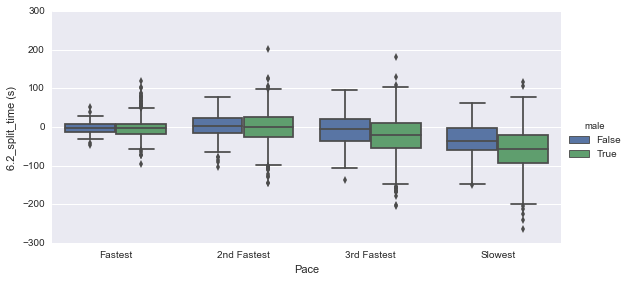

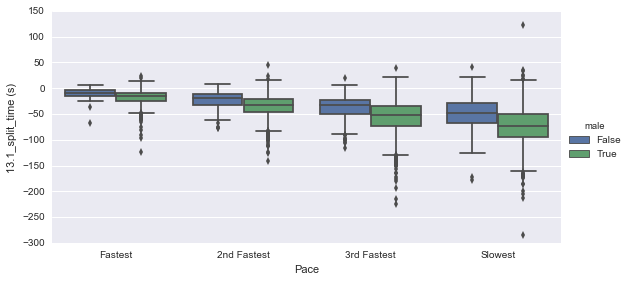

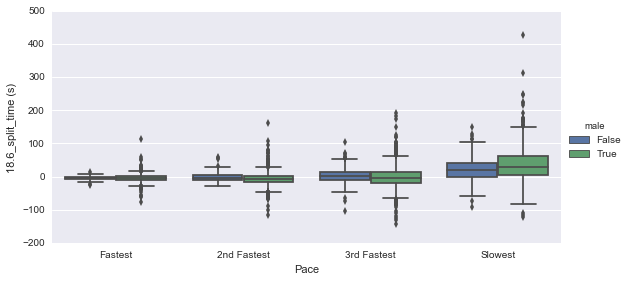

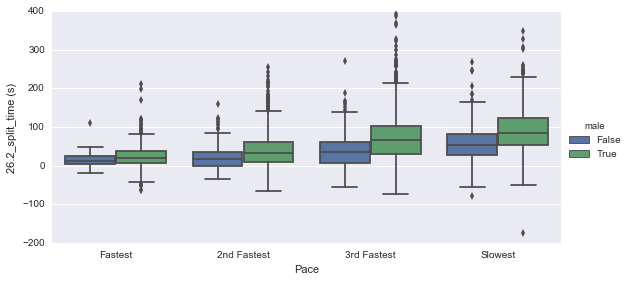

In [242]:
sns.factorplot(data=df4, y='6.2_split_time (s)', x='Pace', kind='box', aspect=2, hue='male')
sns.factorplot(data=df4, y='13.1_split_time (s)', x='Pace', kind='box', aspect=2, hue='male')
sns.factorplot(data=df4, y='18.6_split_time (s)', x='Pace', kind='box', aspect=2, hue='male')
sns.factorplot(data=df4, y='26.2_split_time (s)', x='Pace', kind='box', aspect=2, hue='male')

### Insights: Regardless of the distance interval, the fastest runners always keep their pace at or close to zero. Whereas, runners who finish last have a large deviation in their split times. In fact, those who finish slowest run too fast during the first half of the race and then slow down significantly during the second half. Men were the greatest offenders of this condition. Focus your training on maintaining consistent pace throughout each leg of the race.

## Make df for Top 50 men and women for additional analysis.

#### Start from a clean slate with df2

In [243]:
df2.head()

,Overall_Position,Gender_Position,Country,Category_MFI,Category_MFM1,Category_MFM2,Category_MFS,Category_MMI,Category_MMM1,Category_MMM2,...,6.2_mile_time (s),13.1_mile_time (s),18.6_mile_time (s),male,female,total_runners,6.2_split_time (s),13.1_split_time (s),18.6_split_time (s),26.2_split_time (s)
0,1,1,Kenya,0,0,0,0,0,0,0,...,1835,3888,5616,True,False,True,-6.74,-5.17,11.47,1.90
1,2,2,Kenya,0,0,0,0,1,0,0,...,1834,3888,5616,True,False,True,-6.98,-5.11,11.40,2.08
2,3,3,Ethiopia,0,0,0,0,1,0,0,...,1835,3889,5616,True,False,True,-7.01,-5.30,11.02,2.55
3,4,4,Kenya,0,0,0,0,0,0,0,...,1835,3888,5616,True,False,True,-7.35,-5.78,10.86,3.39
4,5,5,Ethiopia,0,0,0,0,1,0,0,...,1834,3888,5616,True,False,True,-8.24,-6.36,10.14,5.16


#### Identify top 50 men and women and make a top 100 list

In [244]:
top_50_women = df2[((df2.Category_MFI == 1) | (df2.Category_MFM1 == 1) | (df2.Category_MFM2 == 1) | (df2.Category_MFS == 1))].head(50)

In [245]:
top_50_men = df2[(df2.Category_MMI == 1) | (df2.Category_MMM1 == 1) | (df2.Category_MMM2 == 1) | (df2.Category_MMS == 1)].head(50)

In [246]:
combined_top_50 = [top_50_men, top_50_women]
top_100 = pd.concat(combined_top_50)
top_100.head()

,Overall_Position,Gender_Position,Country,Category_MFI,Category_MFM1,Category_MFM2,Category_MFS,Category_MMI,Category_MMM1,Category_MMM2,...,6.2_mile_time (s),13.1_mile_time (s),18.6_mile_time (s),male,female,total_runners,6.2_split_time (s),13.1_split_time (s),18.6_split_time (s),26.2_split_time (s)
0,1,1,Kenya,0,0,0,0,0,0,0,...,1835,3888,5616,True,False,True,-6.74,-5.17,11.47,1.90
1,2,2,Kenya,0,0,0,0,1,0,0,...,1834,3888,5616,True,False,True,-6.98,-5.11,11.40,2.08
2,3,3,Ethiopia,0,0,0,0,1,0,0,...,1835,3889,5616,True,False,True,-7.01,-5.30,11.02,2.55
3,4,4,Kenya,0,0,0,0,0,0,0,...,1835,3888,5616,True,False,True,-7.35,-5.78,10.86,3.39
4,5,5,Ethiopia,0,0,0,0,1,0,0,...,1834,3888,5616,True,False,True,-8.24,-6.36,10.14,5.16


#### Identify those countries who have less than 5 participants.

In [247]:
top_100_other = (top_100.groupby(by='Country ').count().Overall_Position >= 5)
other_list = top_100_other[-top_100_other]
other_list.index

Index([u'Australia', u'Bahrain', u'Czech Republic', u'France', u'Italy',
       u'Macao SAR', u'Mongolia', u'Singapore', u'Taiwan', u'United States'],
      dtype='object', name=u'Country ')

#### Convert those Countries who have less than 5 runners to list 'Other'. 

In [248]:
top_100['Country '].replace([other_list.index],'Other',inplace=True)

In [252]:
top_100.head(12)[10:11]
# showing other has been populated

,Overall_Position,Gender_Position,Country,Category_MFI,Category_MFM1,Category_MFM2,Category_MFS,Category_MMI,Category_MMM1,Category_MMM2,...,6.2_mile_time (s),13.1_mile_time (s),18.6_mile_time (s),male,female,total_runners,6.2_split_time (s),13.1_split_time (s),18.6_split_time (s),26.2_split_time (s)
10,11,11,Other,0,0,0,0,1,0,0,...,2011,4291,6134,True,False,True,-6.29,-0.21,4.44,2.11


#### Make Countries into dummies for clustering:

In [253]:
top_100_2 = top_100.copy()

In [254]:
top_100_2 = pd.get_dummies(top_100_2,columns=['Country '])

#### Cluster:

In [255]:
clu2 = KMeans(n_clusters=4, random_state=0)

In [256]:
clu2.fit(top_100_2)
# cluster fit df3 which has dummies for each country

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [257]:
clu2.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [258]:
top_100_3 = top_100.copy()

In [259]:
top_100_3['cluster'] = clu2.labels_

In [260]:
top_100_3.head()

,Overall_Position,Gender_Position,Country,Category_MFI,Category_MFM1,Category_MFM2,Category_MFS,Category_MMI,Category_MMM1,Category_MMM2,...,13.1_mile_time (s),18.6_mile_time (s),male,female,total_runners,6.2_split_time (s),13.1_split_time (s),18.6_split_time (s),26.2_split_time (s),cluster
0,1,1,Kenya,0,0,0,0,0,0,0,...,3888,5616,True,False,True,-6.74,-5.17,11.47,1.90,3
1,2,2,Kenya,0,0,0,0,1,0,0,...,3888,5616,True,False,True,-6.98,-5.11,11.40,2.08,3
2,3,3,Ethiopia,0,0,0,0,1,0,0,...,3889,5616,True,False,True,-7.01,-5.30,11.02,2.55,3
3,4,4,Kenya,0,0,0,0,0,0,0,...,3888,5616,True,False,True,-7.35,-5.78,10.86,3.39,3
4,5,5,Ethiopia,0,0,0,0,1,0,0,...,3888,5616,True,False,True,-8.24,-6.36,10.14,5.16,3


#### Below are a few modified df's to try and help visualize some interesting findings focused around pace, sorted by official time:

In [261]:
clu3 = top_100_3.groupby(by='cluster').agg({'Overall_Position':'mean',
 'Gender_Position':'mean',
 'Official_Time (s)':'mean',
 '26.2_mile_time (s)':'mean',
 '6.2_mile_time (s)':'mean',
 '13.1_mile_time (s)':'mean',
 '18.6_mile_time (s)':'mean',
 'male':'sum',
 'female':'sum',
 'total_runners':'sum',                              
 '6.2_split_time (s)':'mean',
 '13.1_split_time (s)':'mean',
 '18.6_split_time (s)':'mean',
 '26.2_split_time (s)':'mean',})
clu3.sort_values(by=['Official_Time (s)'])

,13.1_split_time (s),6.2_mile_time (s),Official_Time (s),18.6_mile_time (s),female,6.2_split_time (s),18.6_split_time (s),26.2_mile_time (s),total_runners,13.1_mile_time (s),Gender_Position,Overall_Position,26.2_split_time (s),male
cluster,,,,,,,,,,,,,,
3,-9.93,1858.23,8213.08,5708.92,0.0,-13.69,5.99,8211.23,13.0,3952.23,7.00,7.00,15.85,13.0
1,-5.17,2344.33,9959.19,7002.27,11.0,-1.87,-3.32,9955.71,48.0,4930.58,26.04,37.73,8.62,37.0
0,-11.30,2659.68,11503.79,8005.53,19.0,-9.82,-3.15,11496.58,19.0,5609.42,21.05,256.68,20.55,0.0
2,-9.85,2968.00,12668.10,8866.75,20.0,-4.23,-3.96,12653.15,20.0,6232.35,40.45,668.45,15.27,0.0


In [262]:
clu3.sort_values(by=['Official_Time (s)']).ix[:,['6.2_split_time (s)','13.1_split_time (s)','18.6_split_time (s)','26.2_split_time (s)']]
clu3.sort_values(by=['Official_Time (s)']).ix[:,['6.2_split_time (s)','13.1_split_time (s)','18.6_split_time (s)','26.2_split_time (s)']].describe()

,6.2_split_time (s),13.1_split_time (s),18.6_split_time (s),26.2_split_time (s)
cluster,,,,
3,-13.69,-9.93,5.99,15.85
1,-1.87,-5.17,-3.32,8.62
0,-9.82,-11.30,-3.15,20.55
2,-4.23,-9.85,-3.96,15.27


,6.2_split_time (s),13.1_split_time (s),18.6_split_time (s),26.2_split_time (s)
count,4.00,4.00,4.00,4.00
mean,-7.40,-9.06,-1.11,15.07
std,5.35,2.68,4.75,4.91
min,-13.69,-11.30,-3.96,8.62
25%,-10.79,-10.27,-3.48,13.60
50%,-7.03,-9.89,-3.23,15.56
75%,-3.64,-8.68,-0.86,17.02
max,-1.87,-5.17,5.99,20.55


#### Rename clusters under Pace for ease of interpretation.

In [263]:
top_100_3['Pace'] = top_100_3.cluster
top_100_3.Pace.replace(3,'Fastest',inplace=True)
top_100_3.Pace.replace(1,'2nd Fastest',inplace=True)
top_100_3.Pace.replace(2,'3rd Fastest',inplace=True)
top_100_3.Pace.replace(0,'Slowest',inplace=True)

##  Finding #2: Of the Top 50 men and 50 women:
</br>
<li>These runners are expected to be more strategical about their race pacing. Let's find out!</li> 


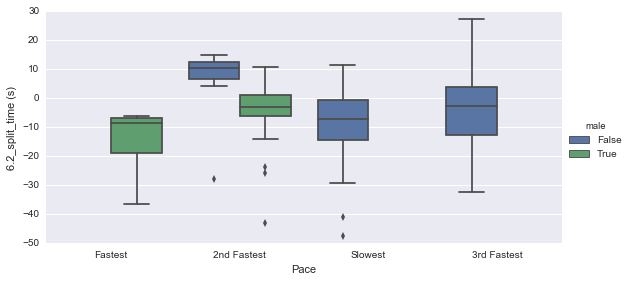

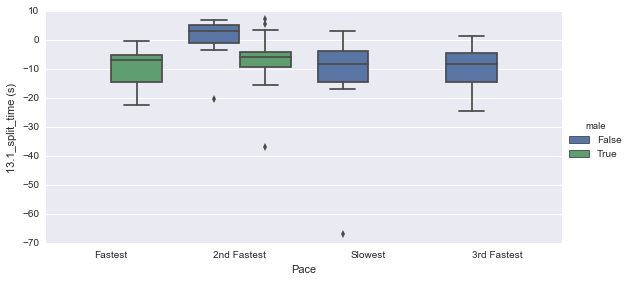

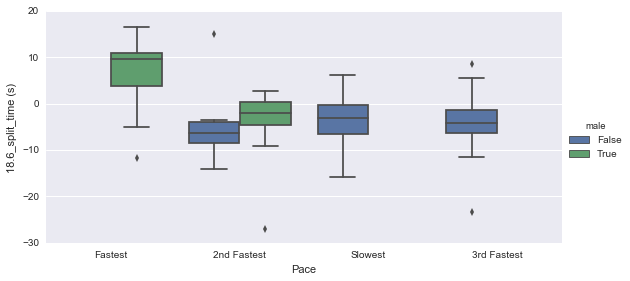

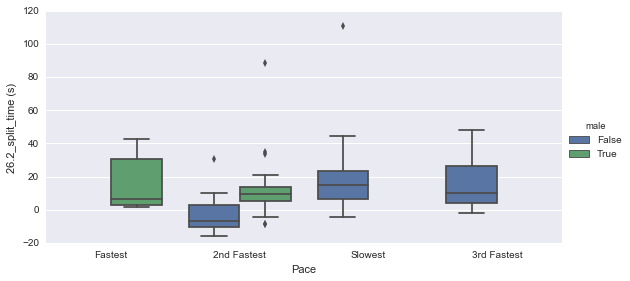

In [264]:
sns.factorplot(data=top_100_3, y='6.2_split_time (s)', x='Pace', kind='box', aspect=2, hue='male')
sns.factorplot(data=top_100_3, y='13.1_split_time (s)', x='Pace', kind='box', aspect=2, hue='male')
sns.factorplot(data=top_100_3, y='18.6_split_time (s)', x='Pace', kind='box', aspect=2, hue='male')
sns.factorplot(data=top_100_3, y='26.2_split_time (s)', x='Pace', kind='box', aspect=2, hue='male')

### Insights: 
#### Only men place in the fastest cluster. They pull ahead in the 1st leg establishing a lead and slow down slightly in the 3rd leg of the race to save up for a push at the end if needed. 
#### Women are introduced in the 2nd fastest cluster. They come out of the gate with a slower pace and then over perform the remainder of the race. Their hardest run miles are those in the 3rd leg of the race which could mean they are spent at the end. 
#### The women in the 3rd fastest and slowest cluster run a similarly paced race to the top performing men. They come out strong in the first three legs and are spent by the end. This is a significantly different strategy to those women who place in the top of their category. Women should consider adjusting their pace like those who placed in the top cluster.